# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


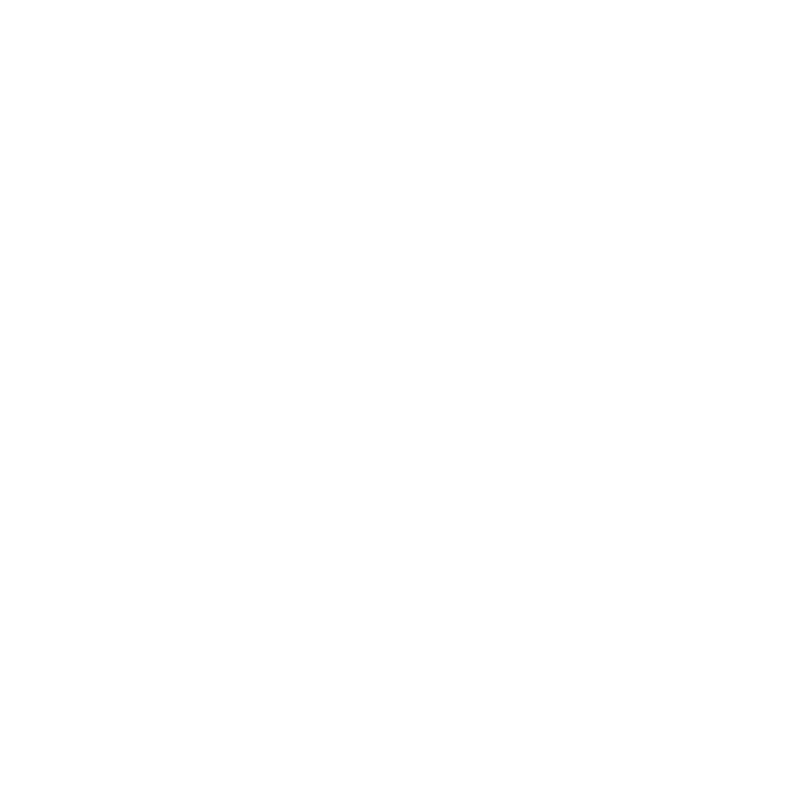

In [25]:
import matplotlib.pyplot as plt
import mplleaflet
from datetime import datetime
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

# Data Manipulation

In [26]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Read data to DataFrame
temp_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Convert temp from tenths of celsius to celsius
temp_df['Data_Value'] = 0.1 * temp_df.Data_Value

# Remove every 29/02 as it could give bad interpretation of data - 4 times less data for this date
days=list(map(lambda x: x.split('-')[-2]+'-'+x.split('-')[-1], temp_df.Date))

temp_df['DaysMonths'] = days
temp_df = temp_df[(temp_df.DaysMonths != '02-29')]

temp_df.sort_values('Date', inplace=True)

# Extract month and day from Date column
temp_df['Month'] = temp_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().month)
temp_df['Day'] = temp_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().day)

# Keep all years but 2015
record_2005_2014_df = temp_df[~temp_df['Date'].str.contains('2015')]

# Get min values for each day
min_df = record_2005_2014_df[['Data_Value',
                              'Month',
                              'Day']].groupby(['Month', 'Day']).min()

# Get max values for each day
max_df = record_2005_2014_df[['Data_Value',
                              'Month',
                              'Day']].groupby(['Month', 'Day']).max()

# Min and Max values to list
record_min = min_df['Data_Value'].tolist()
record_max = max_df['Data_Value'].tolist()

# Keep only 2015
year2015_df = temp_df[temp_df['Date'].str.contains('2015')]

# Get min values
mins2015_df = year2015_df[['Data_Value',
                           'Month',
                           'Day']].groupby(['Month', 'Day']).min()

# Get max values
maxs2015_df = year2015_df[['Data_Value',
                           'Month',
                           'Day']].groupby(['Month', 'Day']).max()

# Min and Max values to list
break_min = mins2015_df['Data_Value']
break_max = maxs2015_df['Data_Value']

# Data Visualization

<IPython.core.display.Javascript object>


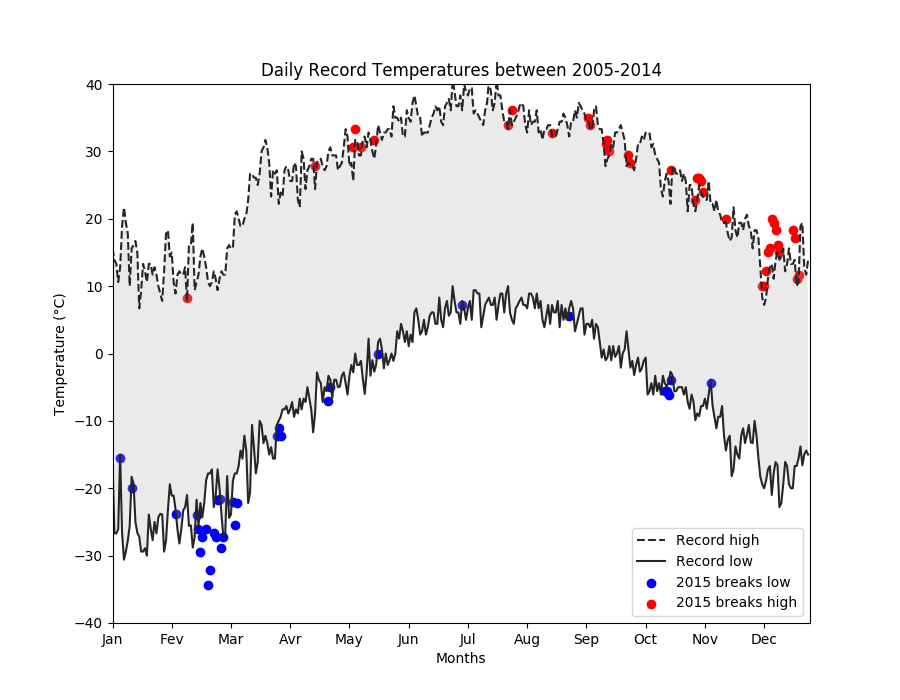

In [28]:
# Draw graph
plt.figure(figsize=(9,7))

# Line graph
plt.plot(np.arange(len(record_min)), record_max, '--', label='Record high', color='#262626')
plt.plot(np.arange(len(record_min)), record_min, '-', label='Record low', color='#262626')

# Scatter points for 2015
plt.scatter(np.where(break_min < record_min),
            break_min[break_min < record_min].values, c = 'b', label= '2015 breaks low')
plt.scatter(np.where(break_max > record_max),
            break_max[break_max > record_max].values, c = 'r', label= '2015 breaks high')

# Fill space between lines
plt.gca().fill_between(range(len(record_min)), 
                       record_min,
                       record_max,
                       facecolor='#adadad', 
                       alpha=0.25)

# Set y axis proper value instead of tenths of Celcius
plt.gca().axis([0, 365, -40, 40])

# Set x ticks as months
plt.xticks(np.arange(0, 365, 31), 
          ['Jan', 'Fev', 'Mar', 'Avr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set label to y axis and title to graph and legend
plt.gca().set_xlabel('Months')
plt.gca().set_ylabel('Temperature (°C)')
plt.gca().set_title('Daily Record Temperatures between 2005-2014') 
plt.legend(loc=4)

plt.show()
